In [2]:
import _pickle as pickle
import logging
import os


#import sklearn
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import random
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.metrics import auc

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
! pip install sklearn_pandas

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#read cleaned data
observations = pd.read_csv('complete_lc_all.gz', compression='gzip',low_memory=False)

In [5]:
observations=observations[['loan_status_bin', 'annual_inc', 'chargeoff_within_12_mths', 'delinq_2yrs', 'dti',
                    'inq_last_6mths','loan_amnt','open_acc','pub_rec','pub_rec_bankruptcies','revol_util_n','revol_bal',
                    'total_acc','emp_length_n','home_ownership_n','purpose_g','term','verification_status','earliest_cr_line_n',
                    'fico_avg','desc1','int_rate_n','application_type','grade','region','year','employ','installment']]

In [6]:
observations = pd.get_dummies(observations, columns=['emp_length_n', 'grade', 'home_ownership_n','verification_status',
                                                         'term','purpose_g','region','application_type','employ'])

In [7]:
observations.columns = list(map(lambda x: x.lower().replace(' ', '_').replace('/', '_').replace('__','_'), observations.columns))




In [8]:
mapper = DataFrameMapper([
        (['loan_amnt'], [Imputer(), StandardScaler()]),
        (['int_rate_n'], [Imputer(), StandardScaler()]),
        (['annual_inc'], [Imputer(), StandardScaler()]),
        (['dti'], [Imputer(), StandardScaler()]),
        (['delinq_2yrs'], [StandardScaler()]),
        (['inq_last_6mths'], [Imputer(), StandardScaler()]),
        (['chargeoff_within_12_mths'], [Imputer(), StandardScaler()]),
        (['open_acc'], [Imputer(), StandardScaler()]),
        (['pub_rec'], [Imputer(), StandardScaler()]),
        (['pub_rec_bankruptcies'], [Imputer(), StandardScaler()]),
        (['revol_bal'], [Imputer(), StandardScaler()]),
        (['revol_util_n'], [Imputer(), StandardScaler()]),
        (['total_acc'], [Imputer(), StandardScaler()]),
        (['year'], None),
        (['earliest_cr_line_n'], [Imputer(), StandardScaler()]),
        (['installment'], [Imputer(), StandardScaler()]),
        (['fico_avg'], [Imputer(), StandardScaler()]),
        (['desc1'], [StandardScaler()]),
        (['term_36_months'], None),
        (['term_60_months'], None),
        (['grade_a'], None),
        (['grade_b'], None),
        (['grade_c'], None),
        (['grade_d'], None),
        (['grade_e'], None),
        (['grade_f'], None),
        (['grade_g'], None),
        (['home_ownership_n_mortgage'], None),
        (['home_ownership_n_own'], None),
        (['home_ownership_n_rent'], None),
        (['verification_status_not_verified'], None),
        (['verification_status_source_verified'], None),
        (['verification_status_verified'], None),
        (['application_type_individual'], None),
        (['application_type_joint_app'], None),
        (['purpose_g_debt'], None),
        (['purpose_g_life_event'], None),
        (['purpose_g_major_purchase'], None),
        (['purpose_g_other'], None),
        (['emp_length_n_0_year'], None),
        (['emp_length_n_1-5_years'], None),
        (['emp_length_n_10+_years'], None),
        (['emp_length_n_6-9_years'], None),
        (['region_midwest'], None),
        (['region_northeast'], None),
        (['region_southeast'], None),
        (['region_southwest'], None),
        (['region_west'], None),
        (['employ_employed', 'employ_unemployed'], None)
        ])

In [9]:
y = observations['loan_status_bin']
X=mapper.fit_transform(observations)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Logistic Regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f1_score(y_train,logreg.predict(X_train)))
print(f1_score(y_test,logreg.predict(X_test)))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[::,1]))
fpr_lg_all, tpr_lg_all, _ = roc_curve(y_test, logreg.predict_proba(X_test)[::,1])
auc_lg_all=round(auc(fpr_lg_all, tpr_lg_all),3)

0.17533287577213452
0.1734309738404045
0.7115352978541793


In [12]:
f1_lg_all=round(f1_score(y_test,logreg.predict(X_test)),3)

In [13]:
threshold=np.arange(0.1,1,0.1)
recall_lg_all=[]
for i in threshold:
    predicted_proba_lg_all = logreg.predict_proba(X_test)
    predicted_lg_all= (predicted_proba_lg_all[:,1] >= i).astype('int')
    recall=float(classification_report(y_test, predicted_lg_all).split()[11])
    recall_lg_all.append(recall)
recall_lg_all

[0.96, 0.76, 0.49, 0.26, 0.1, 0.02, 0.0, 0.0, 0.0]

In [120]:
threshold=np.arange(0.1,1,0.1)
f1_lg_all_list=[]
for i in threshold:
    predicted_proba_lg_all = logreg.predict_proba(X_test)
    predicted_lg_all= (predicted_proba_lg_all[:,1] >= i).astype('int')
    f1_all=round(f1_score(y_test,predicted_lg_all),2)
    f1_lg_all_list.append(f1_all)
f1_lg_all_list

[0.38, 0.4, 0.42, 0.45, 0.47, 0.45, 0.35, 0.14, 0.01]

### Random Forest

In [14]:
randomforest = RandomForestClassifier(n_estimators=80,max_depth=10,max_features= 'sqrt',random_state=42)
randomforest.fit(X_train, y_train)
print(f1_score(y_train,randomforest.predict(X_train)))
print(f1_score(y_test,randomforest.predict(X_test)))
print(roc_auc_score(y_test, randomforest.predict_proba(X_test)[::,1]))
fpr_rf_all, tpr_rf_all, _ = roc_curve(y_test, randomforest.predict_proba(X_test)[::,1])
auc_rf_all=round(auc(fpr_rf_all, tpr_rf_all),3)

0.1493188323660442
0.13748408582505556
0.7243462076393086


In [15]:
threshold=np.arange(0.1,1,0.1)
recall_rf_all=[]
for i in threshold:
    predicted_proba_rf_all = randomforest.predict_proba(X_test)
    predicted_rf_all= (predicted_proba_rf_all[:,1] >= i).astype('int')
    recall=float(classification_report(y_test, predicted_rf_all).split()[11])
    recall_rf_all.append(recall)
recall_rf_all

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.96, 0.79, 0.51, 0.25, 0.08, 0.0, 0.0, 0.0, 0.0]

In [16]:
f1_rf_all=round(f1_score(y_test,randomforest.predict(X_test)),3)

In [121]:
threshold=np.arange(0.1,1,0.1)
f1_rf_all_list=[]
for i in threshold:
    predicted_proba_rf_all = randomforest.predict_proba(X_test)
    predicted_rf_all= (predicted_proba_rf_all[:,1] >= i).astype('int')
    f1_all=round(f1_score(y_test,predicted_rf_all),2)
    f1_rf_all_list.append(f1_all)
f1_rf_all_list

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.38, 0.4, 0.42, 0.45, 0.48, 0.46, 0.32, 0.05, 0.0]

### Gradient Boosting

In [17]:
gradboost =GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,max_depth=6, max_features='sqrt')
gradboost.fit(X_train, y_train)
print(f1_score(y_train,gradboost.predict(X_train)))
print(f1_score(y_test,gradboost.predict(X_test)))
print(roc_auc_score(y_test, gradboost.predict_proba(X_test)[::,1]))
fpr_gb_all, tpr_gb_all, _ = roc_curve(y_test, gradboost.predict_proba(X_test)[::,1])
auc_gb_all=round(auc(fpr_gb_all, tpr_gb_all),3)
print(classification_report(y_test, gradboost.predict(X_test)))

0.27877908249763833
0.2636070168414204
0.7337328544415956
             precision    recall  f1-score   support

          0       0.79      0.96      0.87    406453
          1       0.58      0.17      0.26    123537

avg / total       0.74      0.78      0.73    529990



In [18]:
metrics.recall_score(y_test, gradboost.predict(X_test))

0.17054000016189483

In [19]:
threshold=np.arange(0.1,1,0.1)
recall_gb_all=[]
for i in threshold:
    predicted_proba_gb_all = gradboost.predict_proba(X_test)
    predicted_gb_all= (predicted_proba_gb_all[:,1] >= i).astype('int')
    recall=float(classification_report(y_test, predicted_gb_all).split()[11])
    recall_gb_all.append(recall)
recall_gb_all

[0.94, 0.76, 0.53, 0.33, 0.17, 0.06, 0.01, 0.0, 0.0]

In [20]:
f1_gb_all=round(f1_score(y_test,gradboost.predict(X_test)),3)

In [122]:
threshold=np.arange(0.1,1,0.1)
f1_gb_all_list=[]
for i in threshold:
    predicted_proba_gb_all = gradboost.predict_proba(X_test)
    predicted_gb_all= (predicted_proba_gb_all[:,1] >= i).astype('int')
    f1_all=round(f1_score(y_test,predicted_gb_all),2)
    f1_gb_all_list.append(f1_all)
f1_gb_all_list

[0.38, 0.4, 0.44, 0.47, 0.49, 0.48, 0.4, 0.2, 0.01]

[[255522 150931]
 [ 34825  88712]]


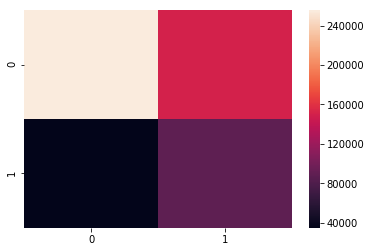

In [145]:
import seaborn as sn
cm=metrics.confusion_matrix(y_test,gradboost.predict(X_test))
print(cm)
sn.heatmap(cm)

In [21]:
importance=gradboost.feature_importances_

In [22]:
zipped=dict(zip(observations.columns[1:].tolist(),importance))

In [23]:
df = pd.DataFrame().append(zipped, ignore_index=True).T.sort_values(by=0,ascending=False)
df

,0
fico_avg,0.091251
chargeoff_within_12_mths,0.080629
revol_bal,0.071078
dti,0.067846
delinq_2yrs,0.066599
earliest_cr_line_n,0.052502
annual_inc,0.052238
int_rate_n,0.052201
total_acc,0.051533
desc1,0.050684


### Naive Bayes

In [24]:
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)

print(roc_auc_score(y_test, nb.predict(X_test)))
fpr_nb_all, tpr_nb_all, _ = roc_curve(y_test, nb.predict_proba(X_test)[::,1])
auc_nb_all=round(auc(fpr_nb_all, tpr_nb_all),3)
print(classification_report(y_test, nb.predict(X_test)))

0.6090264613532118
             precision    recall  f1-score   support

          0       0.82      0.82      0.82    406453
          1       0.40      0.40      0.40    123537

avg / total       0.72      0.72      0.72    529990



In [45]:
auc_nb_all=round(auc(fpr_nb_all, tpr_nb_all),3)

In [26]:
threshold=np.arange(0.1,1,0.1)
recall_nb_all=[]
for i in threshold:
    predicted_proba_nb_all = nb.predict_proba(X_test)
    predicted_nb_all= (predicted_proba_nb_all[:,1] >= i).astype('int')
    recall=float(classification_report(y_test, predicted_nb_all).split()[11])
    recall_nb_all.append(recall)
recall_nb_all

[0.56, 0.5, 0.46, 0.42, 0.4, 0.38, 0.35, 0.33, 0.29]

In [27]:
f1_nb_all=round(f1_score(y_test,nb.predict(X_test)),3)

### Decision Tree

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(roc_auc_score(y_test, dt.predict(X_test)))
fpr_dt_all, tpr_dt_all, _ = roc_curve(y_test, dt.predict_proba(X_test)[::,1])
auc_dt_all=round(auc(fpr_dt_all, tpr_dt_all),3)
print(classification_report(y_test, dt.predict(X_test)))

0.5619966514631023
             precision    recall  f1-score   support

          0       0.80      0.78      0.79    406453
          1       0.32      0.34      0.33    123537

avg / total       0.69      0.68      0.68    529990



In [29]:
f1_dt_all=round(f1_score(y_test,dt.predict(X_test)),3)

### SVM

In [30]:
s = observations.sample(100000)


In [31]:
s.loan_status_bin.value_counts()

0    76862
1    23138
Name: loan_status_bin, dtype: int64

In [32]:
y_s_all = s['loan_status_bin']
X_s_all = mapper.fit_transform(s)
X_strain_all, X_stest_all, y_strain_all, y_stest_all = train_test_split(X_s_all, y_s_all, test_size=0.4,random_state=42)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_strain_all, y_strain_all)
print(classification_report(y_stest_all, svm.predict(X_stest_all)))
fpr_svm_all, tpr_svm_all, _ = roc_curve(y_stest_all, svm.predict_proba(X_stest_all)[::,1])
auc_svm_all=round(auc(fpr_svm_all, tpr_svm_all),3)
#print(roc_auc_score(y_stest_all, svm.predict(X_stest_all)))
print(auc_svm_all)

             precision    recall  f1-score   support

          0       0.79      0.97      0.87     30834
          1       0.57      0.12      0.19      9166

avg / total       0.74      0.78      0.72     40000

0.725


In [34]:
auc_svm_all=round(auc(fpr_svm_all, tpr_svm_all),3)

In [35]:
threshold=np.arange(0.1,1,0.1)
recall_svm_all=[]
for i in threshold:
    predicted_proba_svm_all = svm.predict_proba(X_stest_all)
    predicted_svm_all= (predicted_proba_svm_all[:,1] >= i).astype('int')
    recall=float(classification_report(y_stest_all, predicted_svm_all).split()[11])
    recall_svm_all.append(recall)
recall_svm_all

[0.92, 0.7, 0.46, 0.27, 0.13, 0.05, 0.01, 0.0, 0.0]

In [36]:
f1_svm_all=round(f1_score(y_stest_all,svm.predict(X_stest_all)),3)

In [123]:
threshold=np.arange(0.1,1,0.1)
f1_svm_all_list=[]
for i in threshold:
    predicted_proba_svm_all = svm.predict_proba(X_stest_all)
    predicted_svm_all= (predicted_proba_svm_all[:,1] >= i).astype('int')
    f1_all=round(f1_score(y_stest_all,predicted_svm_all),2)
    f1_svm_all_list.append(f1_all)
f1_svm_all_list

[0.38, 0.4, 0.43, 0.45, 0.48, 0.47, 0.4, 0.2, 0.02]

### KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_strain_all, y_strain_all)
print(classification_report(y_stest_all, knn.predict(X_stest_all)))
#print(roc_auc_score(y_stest_all, knn.predict(X_stest_all)))
fpr_knn_all, tpr_knn_all, _ = roc_curve(y_stest_all, knn.predict_proba(X_stest_all)[::,1])
auc_knn_all=round(auc(fpr_knn_all, tpr_knn_all),2)
print(auc_knn_all)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85     30834
          1       0.42      0.22      0.29      9166

avg / total       0.71      0.75      0.72     40000

0.64


In [38]:
auc_knn_all=round(auc(fpr_knn_all, tpr_knn_all),3)

In [39]:
f1_knn_all=round(f1_score(y_stest_all,knn.predict(X_stest_all)),3)

### ROC Curve

<Figure size 432x288 with 0 Axes>

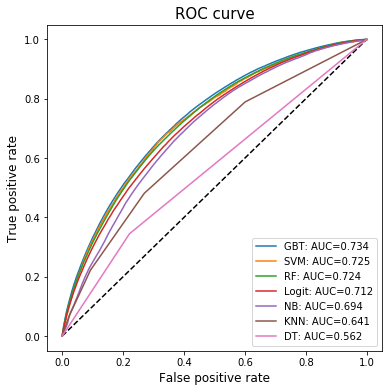

In [46]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb_all, tpr_gb_all, label='GBT: AUC='+str(auc_gb_all));
plt.plot(fpr_svm_all, tpr_svm_all, label='SVM: AUC='+str(auc_svm_all));
plt.plot(fpr_rf_all, tpr_rf_all, label=('RF: AUC='+ str(auc_rf_all)));
plt.plot(fpr_lg_all, tpr_lg_all, label='Logit: AUC='+str(auc_lg_all));
plt.plot(fpr_nb_all, tpr_nb_all, label='NB: AUC='+str(auc_nb_all));
plt.plot(fpr_knn_all, tpr_knn_all, label='KNN: AUC='+str(auc_knn_all));
plt.plot(fpr_dt_all, tpr_dt_all, label='DT: AUC='+str(auc_dt_all));
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve', fontsize='15')
plt.legend(loc='best');
plt.savefig('ROC.png', dpi=500);

<Figure size 432x288 with 0 Axes>

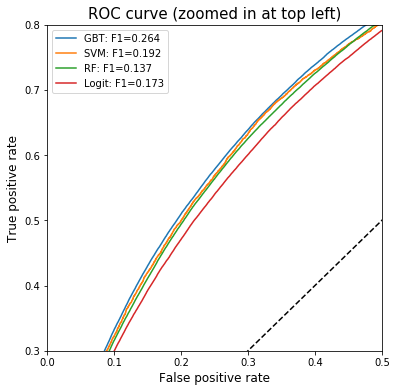

In [48]:
plt.figure(figsize=(6,6))
plt.xlim(0, 0.5)
plt.ylim(0.3, 0.8)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb_all, tpr_gb_all, label='GBT: F1='+str(f1_gb_all))
plt.plot(fpr_svm_all, tpr_svm_all, label='SVM: F1='+str(f1_svm_all))
plt.plot(fpr_rf_all, tpr_rf_all, label=('RF: F1='+ str(f1_rf_all)))
plt.plot(fpr_lg_all, tpr_lg_all, label='Logit: F1='+str(f1_lg_all))
#plt.plot(fpr_nb_all, tpr_nb_all, label='NB: F1='+str(f1_nb_all))
#plt.plot(fpr_knn_all, tpr_knn_all, label='KNN: F1='+str(f1_knn_all))
#plt.plot(fpr_dt_all, tpr_dt_all, label='DT: F1='+str(f1_dt_all))
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve (zoomed in at top left)',fontsize='15')
plt.legend(loc='best')
plt.savefig('ROC-Zoom.png', dpi=500);

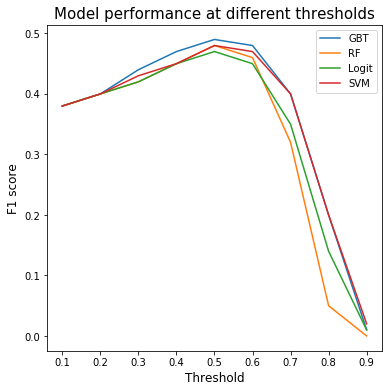

In [136]:
plt.figure(figsize=(6,6))
plt.plot(threshold, f1_gb_all_list, label='GBT')
plt.plot(threshold, f1_rf_all_list, label='RF')
plt.plot(threshold, f1_lg_all_list, label='Logit')
plt.plot(threshold, f1_svm_all_list, label='SVM')
#plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('Threshold', fontsize='12')
plt.ylabel('F1 score',fontsize='12')
plt.title('Model performance at different thresholds', fontsize='15')
plt.legend(loc='best');
plt.savefig('F1.png', dpi=500)


# Balanced subset

In [138]:
g = observations.groupby('loan_status_bin')
subset=g.apply(lambda x: x.sample((g.size().min())//5))

In [139]:
subset.loan_status_bin.value_counts()

1    49406
0    49406
Name: loan_status_bin, dtype: int64

In [140]:
y_s = subset['loan_status_bin']
X_s = mapper.fit_transform(subset)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [141]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_s, y_s, test_size=0.5,random_state=42)

### GridSearch

In [ ]:
import logging

import numpy
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


def generate_gbm_model(X_train, y_train):
    logging.info('Training gbm model')

    # Create pipeline
    pipe = Pipeline(steps=[('gbm', GradientBoostingClassifier())])

    # Create param grid
    params = {
        'gbm__learning_rate': numpy.logspace(-2, 0, 4),
        'gbm__n_estimators': numpy.arange(20, 200, 40),
        'gbm__max_depth': numpy.arange(1, 15, 3),
        'gbm__max_features': ['sqrt', 'log2']
    }

    # Create estimator
    estimator = RandomizedSearchCV(pipe, params, n_iter=3,scoring='roc_auc')

    # Train estimator
    estimator.fit(X_train, y_train)

    return estimator


def generate_svm_model(X_train, y_train):
    logging.info('Training svm model')

    # Create pipeline
    pipe = Pipeline(steps=[('pca', PCA()), ('svm', SVC(probability=True))])

    # Create param grid
    params = {
        'pca__n_components': [1, 2, 4, 6, 8, None],
        'pca__whiten': [False, True],
        'svm__kernel': ['linear', 'poly', 'rbf'],
        'svm__degree': numpy.arange(1, 15, 3),
    }

    # Create estimator
    estimator = RandomizedSearchCV(pipe, params, n_iter=3)

    # Train estimator
    estimator.fit(X_train, y_train)

    return estimator

def generate_rfm_model(X_train, y_train):
    logging.info('Training rfm model')

    # Create pipeline
    pipe = Pipeline(steps=[('rfm', RandomForestClassifier())])

    # Create param grid
    params = {
        'rfm__n_estimators': numpy.arange(20,200,40),
        'rfm__max_depth': numpy.arange(1, 15, 3),
        'rfm__max_features': ['sqrt', 'log2']
    }

    # Create estimator
    estimator = RandomizedSearchCV(pipe, params, n_iter=3)

    # Train estimator
    estimator.fit(X_train, y_train)

    return estimator

def generate_lrm_model(X_train, y_train):
    logging.info('Training lrm model')

    # Create pipeline
    pipe = Pipeline(steps=[('lrm', LogisticRegression())])

    # Create param grid
    params = {
        'lrm__C': numpy.arange(0.1, 5, 1)
    }

    # Create estimator
    estimator = RandomizedSearchCV(pipe, params, n_iter=3)

    # Train estimator
    estimator.fit(X_train, y_train)

    return estimator

In [ ]:
model_functions = {'gbm': generate_gbm_model,
                   #'svm': generate_svm_model,
                   #'rfm': generate_rfm_model,
                   #'lrm': generate_lrm_model
                  }

In [ ]:
from sklearn import metrics
results = list()

for (model_name, model_function) in model_functions.items():
    local_dict = dict()
    local_dict['model_label'] = model_name
    estimator = model_function(X_strain_all, y_strain_all)
    local_dict['estimator'] = estimator
    test_preds = estimator.predict(X_stest_all)
    local_dict['precision'] = metrics.precision_score(y_stest_all, test_preds)
    local_dict['recall'] = metrics.recall_score(y_stest_all, test_preds)
    local_dict['auc'] = metrics.roc_auc_score(y_stest_all, estimator.predict_proba(X_stest_all)[:, 1])
    local_dict['best_params']=estimator.best_params_
    results.append(local_dict)
results = pandas.DataFrame(results)
results

In [ ]:
results.best_params[0]

### Random Forest

In [61]:
randomforest = RandomForestClassifier(n_estimators=80,max_depth=10,max_features= 'sqrt',random_state=42)
randomforest.fit(X_strain, y_strain)
print(accuracy_score(y_strain,randomforest.predict(X_strain)))
accuracy_rf=accuracy_score(y_stest,randomforest.predict(X_stest))
print(accuracy_rf)
print(roc_auc_score(y_stest, randomforest.predict_proba(X_stest)[::,1]))
fpr_rf, tpr_rf, _ = roc_curve(y_stest, randomforest.predict_proba(X_stest)[::,1])
print(classification_report(y_stest, randomforest.predict(X_stest)))

0.6749921063497333
0.6614919403806764
0.7222843533982674
             precision    recall  f1-score   support

          0       0.67      0.63      0.65    123723
          1       0.65      0.69      0.67    123311

avg / total       0.66      0.66      0.66    247034



In [62]:
auc_rf=round(auc(fpr_rf, tpr_rf),3)


In [64]:
accuracy_rf=round(accuracy_rf,2)

In [129]:
f1_rf=round(f1_score(y_stest,randomforest.predict(X_stest)),3)

In [130]:
f1_rf

0.676

In [65]:
threshold=np.arange(0.1,1,0.1)
recall_rf=[]
for i in threshold:
    predicted_proba_rf = randomforest.predict_proba(X_stest)
    predicted_rf= (predicted_proba_rf [:,1] >= i).astype('int')
    recall=float(classification_report(y_stest, predicted_rf).split()[11])
    recall_rf.append(recall)
recall_rf

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[1.0, 0.99, 0.94, 0.86, 0.69, 0.46, 0.21, 0.02, 0.0]

In [103]:
threshold=np.arange(0.1,1,0.1)
f1_rf_list=[]
for i in threshold:
    predicted_proba_rf = randomforest.predict_proba(X_stest)
    predicted_rf= (predicted_proba_rf [:,1] >= i).astype('int')
    f1=round(f1_score(y_stest,predicted_rf),2)
    f1_rf_list.append(f1)
f1_rf_list

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.67, 0.68, 0.7, 0.71, 0.68, 0.56, 0.33, 0.05, 0.0]

### Gradient Boosting

In [67]:
gradboost =GradientBoostingClassifier(learning_rate=0.2,n_estimators=80,max_depth=6, max_features='sqrt')
gradboost.fit(X_strain, y_strain)
print(accuracy_score(y_strain,gradboost.predict(X_strain)))
accuracy_gb=accuracy_score(y_stest,gradboost.predict(X_stest))
print(accuracy_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_stest, gradboost.predict_proba(X_stest)[::,1])
auc_gb=round(auc(fpr_gb, tpr_gb),3)
print(auc_gb)
print(classification_report(y_stest, gradboost.predict(X_stest)))

0.6848409530671892
0.6698308734830023
0.732
             precision    recall  f1-score   support

          0       0.68      0.65      0.67    123723
          1       0.66      0.68      0.67    123311

avg / total       0.67      0.67      0.67    247034



In [68]:
accuracy_gb=round(accuracy_gb,2)

In [131]:
f1_gb=round(f1_score(y_stest,gradboost.predict(X_stest)),3)

In [69]:
threshold=np.arange(0.1,1,0.1)
recall_gb=[]
for i in threshold:
    predicted_proba_gb = gradboost.predict_proba(X_stest)
    predicted_gb= (predicted_proba_gb [:,1] >= i).astype('int')
    recall=float(classification_report(y_stest, predicted_gb).split()[11])
    recall_gb.append(recall)
recall_gb

[1.0, 0.98, 0.92, 0.82, 0.68, 0.51, 0.3, 0.1, 0.0]

In [107]:
threshold=np.arange(0.1,1,0.1)
f1_gb_list=[]
for i in threshold:
    predicted_proba_gb = gradboost.predict_proba(X_stest)
    predicted_gb= (predicted_proba_gb[:,1] >= i).astype('int')
    f1=round(f1_score(y_stest,predicted_gb),2)
    f1_gb_list.append(f1)
f1_gb_list

[0.67, 0.69, 0.71, 0.71, 0.68, 0.6, 0.44, 0.19, 0.01]

### Logistic Regression

In [70]:
logreg = LogisticRegression()
logreg.fit(X_strain, y_strain)
print(accuracy_score(y_strain,logreg.predict(X_strain)))
accuracy_lg=accuracy_score(y_stest,logreg.predict(X_stest))
print(accuracy_lg)
print(roc_auc_score(y_stest, logreg.predict_proba(X_stest)[::,1]))
fpr_lg, tpr_lg, _ = roc_curve(y_stest, logreg.predict_proba(X_stest)[::,1])

0.6540233328205834
0.6537237789130241
0.7124552777551705


In [71]:
auc_lg=round(auc(fpr_lg, tpr_lg),3)

In [72]:
accuracy_lg=round(accuracy_lg,2)

In [132]:
f1_lg=round(f1_score(y_stest,logreg.predict(X_stest)),3)

In [73]:
threshold=np.arange(0.1,1,0.1)
recall_lg=[]
for i in threshold:
    predicted_proba_lg = logreg.predict_proba(X_stest)
    predicted_lg= (predicted_proba_lg [:,1] >= i).astype('int')
    recall=float(classification_report(y_stest, predicted_lg).split()[11])
    recall_lg.append(recall)
recall_lg

[1.0, 0.98, 0.93, 0.83, 0.67, 0.46, 0.24, 0.06, 0.0]

In [108]:
threshold=np.arange(0.1,1,0.1)
f1_lg_list=[]
for i in threshold:
    predicted_proba_lg = logreg.predict_proba(X_stest)
    predicted_lg= (predicted_proba_lg[:,1] >= i).astype('int')
    f1=round(f1_score(y_stest,predicted_lg),2)
    f1_lg_list.append(f1)
f1_lg_list

[0.67, 0.68, 0.7, 0.7, 0.66, 0.56, 0.37, 0.12, 0.0]

### Naive Bayes

In [ ]:
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
nb.fit(X_strain, y_strain)

print(classification_report(y_stest, nb.predict(X_stest)))

print(roc_auc_score(y_stest, nb.predict(X_stest)))
fpr_nb, tpr_nb, _ = roc_curve(y_stest, nb.predict_proba(X_stest)[::,1])

In [ ]:
auc_nb=round(auc(fpr_nb, tpr_nb),3)
accuracy_nb=round(accuracy_score(fpr_nb, tpr_nb),3)

In [ ]:
threshold=np.arange(0.1,1,0.1)
recall_nb=[]
for i in threshold:
    predicted_proba_nb = nb.predict_proba(X_stest)
    predicted_nb= (predicted_proba_nb [:,1] >= i).astype('int')
    recall=float(classification_report(y_stest, predicted_nb).split()[11])
    recall_nb.append(recall)
recall_nb

### SVM

In [80]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_strain, y_strain)
print(accuracy_score(y_strain,svm.predict(X_strain)))
accuracy_svm=accuracy_score(y_stest,svm.predict(X_stest))
print(classification_report(y_stest, svm.predict(X_stest)))
auc_svm=roc_auc_score(y_stest, svm.predict(X_stest))
print(auc_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_stest, svm.predict_proba(X_stest)[::,1])


0.664676355098571
             precision    recall  f1-score   support

          0       0.67      0.63      0.65     24752
          1       0.65      0.69      0.67     24654

avg / total       0.66      0.66      0.66     49406

0.6605140598370131


In [82]:
auc_svm=round(auc_svm,3)

In [83]:
accuracy_svm=round(accuracy_svm,2)

In [134]:
f1_svm=round(f1_score(y_stest,svm.predict(X_stest)),3)

In [91]:
threshold=np.arange(0.1,1,0.1)
recall_svm=[]
for i in threshold:
    predicted_proba_svm = svm.predict_proba(X_stest)
    predicted_svm= (predicted_proba_svm [:,1] >= i).astype('int')
    recall=float(classification_report(y_stest, predicted_svm).split()[11])
    recall_svm.append(recall)
recall_svm

[1.0, 0.97, 0.92, 0.83, 0.7, 0.51, 0.3, 0.1, 0.01]

In [142]:
threshold=np.arange(0.1,1,0.1)
f1_svm_list=[]
for i in threshold:
    predicted_proba_svm = svm.predict_proba(X_stest)
    predicted_svm= (predicted_proba_svm[:,1] >= i).astype('int')
    f1=round(f1_score(y_stest,predicted_svm),2)
    f1_svm_list.append(f1)
f1_svm_list

[0.67, 0.69, 0.7, 0.7, 0.67, 0.59, 0.43, 0.19, 0.01]

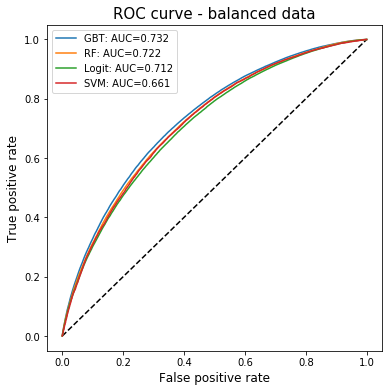

In [85]:
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')


plt.plot(fpr_gb, tpr_gb, label='GBT: AUC='+str(auc_gb))
plt.plot(fpr_rf, tpr_rf, label=('RF: AUC='+ str(auc_rf)))
plt.plot(fpr_lg, tpr_lg, label='Logit: AUC='+str(auc_lg))
plt.plot(fpr_svm, tpr_svm, label='SVM: AUC='+str(auc_svm))
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve - balanced data',fontsize='15')
plt.legend(loc='best')
plt.savefig('ROC-ba.png', dpi=500);

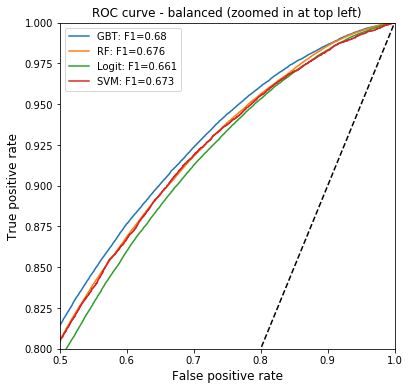

In [135]:
plt.figure(figsize=(6,6))
plt.xlim(0.5, 1)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_gb, tpr_gb, label='GBT: F1='+str(f1_gb))
plt.plot(fpr_rf, tpr_rf, label=('RF: F1='+ str(f1_rf)))
plt.plot(fpr_lg, tpr_lg, label='Logit: F1='+str(f1_lg))
plt.plot(fpr_svm, tpr_svm, label='SVM: F1='+str(f1_svm))
plt.xlabel('False positive rate',fontsize='12')
plt.ylabel('True positive rate',fontsize='12')
plt.title('ROC curve - balanced (zoomed in at top left)',fontsize='12')
plt.legend(loc='best')
plt.savefig('ROC-ba-zoom.png', dpi=500);

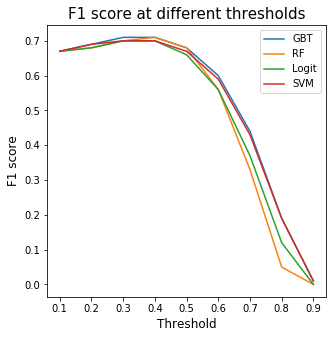

In [146]:
plt.figure(figsize=(5,5))
plt.plot(threshold, f1_gb_list, label='GBT')
plt.plot(threshold, f1_rf_list, label='RF')
plt.plot(threshold, f1_lg_list, label='Logit')
plt.plot(threshold, f1_svm_list, label='SVM')
#plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('Threshold',fontsize='12')
plt.ylabel('F1 score',fontsize='12')
plt.title('F1 score at different thresholds',fontsize='15')
plt.legend(loc='best')
plt.savefig('F1-ba.png', dpi=500);